<a href="https://colab.research.google.com/github/anushirahatti/covid-19-analysis/blob/master/src/covid_19_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ingest:**

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [0]:
#basic
world_data = pd.read_csv("https://raw.githubusercontent.com/anushirahatti/covid-19-analysis/master/data/covid_19_data.csv")
who_data = pd.read_csv("https://raw.githubusercontent.com/anushirahatti/covid-19-analysis/master/data/full_data.csv")

**Exploratory Data Analysis (EDA):**

In [0]:
world_data.drop('SNo', axis=1, inplace=True)

In [0]:
world_data["ObservationDate"] = pd.to_datetime(world_data["ObservationDate"]).dt.strftime('%Y-%m-%d')

In [0]:
world_data.columns = world_data.columns.str.replace("/", "_") 
world_data.columns = world_data.columns.str.replace(" ", "_") 

In [0]:
world_data.rename(columns = {'ObservationDate':'date'}, inplace = True)
who_data.rename(columns = {'location':'Country_Region'}, inplace = True)

In [257]:
world_data.head()

,date,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [258]:
who_data.head()

,date,Country_Region,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,NaN,NaN,1,NaN
1,2020-02-26,Afghanistan,0.0,NaN,1,NaN
2,2020-02-27,Afghanistan,0.0,NaN,1,NaN
3,2020-02-28,Afghanistan,0.0,NaN,1,NaN
4,2020-02-29,Afghanistan,0.0,NaN,1,NaN


In [259]:
world_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4935 entries, 0 to 4934
Data columns (total 7 columns):
date              4935 non-null object
Province_State    3120 non-null object
Country_Region    4935 non-null object
Last_Update       4935 non-null object
Confirmed         4935 non-null int64
Deaths            4935 non-null int64
Recovered         4935 non-null int64
dtypes: int64(3), object(4)
memory usage: 270.0+ KB


In [260]:
who_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2407 entries, 0 to 2406
Data columns (total 6 columns):
date              2407 non-null object
Country_Region    2407 non-null object
new_cases         2271 non-null float64
new_deaths        417 non-null float64
total_cases       2407 non-null int64
total_deaths      454 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 113.0+ KB


In [261]:
world_data.isnull().sum()

date                 0
Province_State    1815
Country_Region       0
Last_Update          0
Confirmed            0
Deaths               0
Recovered            0
dtype: int64

In [262]:
who_data.isnull().sum()

date                 0
Country_Region       0
new_cases          136
new_deaths        1990
total_cases          0
total_deaths      1953
dtype: int64

In [0]:
world_data["Province_State"].fillna("Unknown", inplace=True)

In [0]:
who_data.new_cases.fillna(0, inplace=True)
who_data.new_deaths.fillna(0, inplace=True)
who_data.total_deaths.fillna(0, inplace=True)

In [265]:
world_data["Country_Region"].unique()

array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
       'Thailand', 'South Korea', 'Singapore', 'Philippines', 'Malaysia',
       'Vietnam', 'Australia', 'Mexico', 'Brazil', 'Colombia', 'France',
       'Nepal', 'Canada', 'Cambodia', 'Sri Lanka', 'Ivory Coast',
       'Germany', 'Finland', 'United Arab Emirates', 'India', 'Italy',
       'UK', 'Russia', 'Sweden', 'Spain', 'Belgium', 'Others', 'Egypt',
       'Iran', 'Israel', 'Lebanon', 'Iraq', 'Oman', 'Afghanistan',
       'Bahrain', 'Kuwait', 'Austria', 'Algeria', 'Croatia',
       'Switzerland', 'Pakistan', 'Georgia', 'Greece', 'North Macedonia',
       'Norway', 'Romania', 'Denmark', 'Estonia', 'Netherlands',
       'San Marino', ' Azerbaijan', 'Belarus', 'Iceland', 'Lithuania',
       'New Zealand', 'Nigeria', 'North Ireland', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Czech Republic',
       'Armenia', 'Dominican Republic', 'Indonesia', 'Portugal',
       'Andorra', 'Latvia

In [266]:
who_data["Country_Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus',
       'Belgium', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       "Cote d'Ivoire", 'Democratic Republic of Congo', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'Estonia', 'Ethiopia',
       'Faeroe Islands', 'Finland', 'France', 'French Guiana',
       'French Polynesia', 'Gabon', 'Georgia', 'Germany', 'Ghana',
       'Gibraltar', 'Greece', 'Guadeloupe', 'Guernsey', 'Guinea',
       'Guyana', 'Vatican', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'International', 'Iran', 'Iraq', 'Ireland', 'Israel',
       'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan

In [267]:
who_data["Country_Region"].nunique()

137

In [268]:
world_data["Country_Region"].nunique()

128

In [269]:
world_data[world_data['Country_Region'].str.contains("India")]

,date,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered
430,2020-01-30,Unknown,India,1/30/20 16:00,1,0,0
491,2020-01-31,Unknown,India,1/31/2020 23:59,1,0,0
547,2020-02-01,Unknown,India,1/31/2020 8:15,1,0,0
607,2020-02-02,Unknown,India,2020-02-02T06:03:08,2,0,0
672,2020-02-03,Unknown,India,2020-02-03T21:43:02,3,0,0
740,2020-02-04,Unknown,India,2020-02-03T21:43:02,3,0,0
810,2020-02-05,Unknown,India,2020-02-03T21:43:02,3,0,0
881,2020-02-06,Unknown,India,2020-02-03T21:43:02,3,0,0
954,2020-02-07,Unknown,India,2020-02-03T21:43:02,3,0,0
1026,2020-02-08,Unknown,India,2020-02-03T21:43:02,3,0,0


In [0]:
world_data["Country_Region"].replace({"Mainland China": "China", "Congo (Kinshasa)": "Democratic Republic of Congo", "Ivory Coast": "Cote d'Ivoire", "Faroe Islands": "Faeroe Islands", "Vatican City	": "Vatican", "Republic of Ireland": "Ireland", "North Ireland": "Ireland", "North Macedonia": "Macedonia", "Saint Barthelemy": "Saint Barthlemy", "('St. Martin',)": "Saint Martin (French part)", "St. Martin": "Saint Martin (French part)", "UK": "United Kingdom", "US": "United States"}, inplace=True)

In [271]:
world_data["Country_Region"].nunique()

125

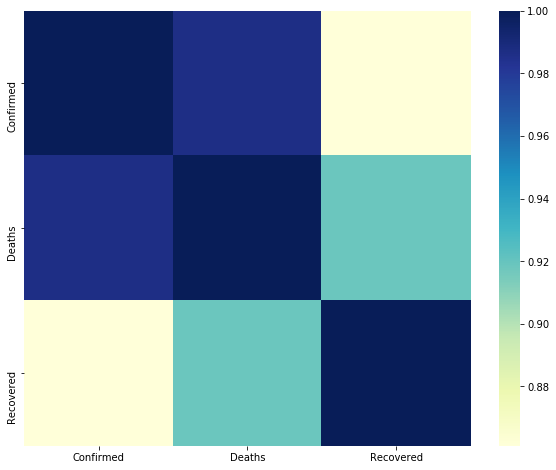

In [272]:
plt.figure(figsize=(10,8))
sns.heatmap(world_data.corr(), cmap="YlGnBu")

In [273]:
world_data.corr()

,Confirmed,Deaths,Recovered
Confirmed,1.000000,0.986453,0.861006
Deaths,0.986453,1.000000,0.918569
Recovered,0.861006,0.918569,1.000000


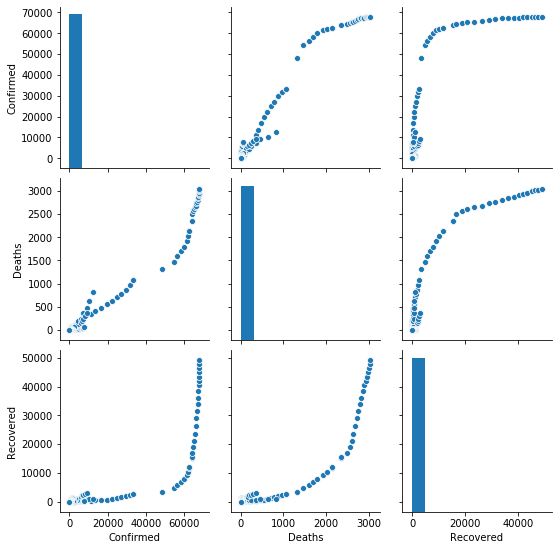

In [274]:
sns.pairplot(world_data)

In [275]:
fig = go.Figure([go.Scatter(x=world_data['date'], y=world_data['Confirmed'])])
fig.show()

In [276]:
fig = go.Figure()
fig.add_trace(go.Scatter(
                x=world_data['date'],
                y=world_data['Recovered'],
                name="Recovered",
                line_color='deepskyblue',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=world_data['date'],
                y=world_data['Deaths'],
                name="Deaths",
                line_color='dimgray',
                opacity=0.8))

fig.update_layout(title_text="Recovery and Deaths with Rangeslider", xaxis_rangeslider_visible=True)
fig.show()

In [0]:
new_data_combined = pd.merge(world_data, who_data, how='outer', on=['date', 'Country_Region'])

In [278]:
new_data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5425 entries, 0 to 5424
Data columns (total 11 columns):
date              5425 non-null object
Province_State    4935 non-null object
Country_Region    5425 non-null object
Last_Update       4935 non-null object
Confirmed         4935 non-null float64
Deaths            4935 non-null float64
Recovered         4935 non-null float64
new_cases         5141 non-null float64
new_deaths        5141 non-null float64
total_cases       5141 non-null float64
total_deaths      5141 non-null float64
dtypes: float64(7), object(4)
memory usage: 508.6+ KB


In [279]:
new_data_combined.head()

,date,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,new_cases,new_deaths,total_cases,total_deaths
0,2020-01-22,Anhui,China,1/22/2020 17:00,1.0,0.0,0.0,32.0,0.0,310.0,6.0
1,2020-01-22,Beijing,China,1/22/2020 17:00,14.0,0.0,0.0,32.0,0.0,310.0,6.0
2,2020-01-22,Chongqing,China,1/22/2020 17:00,6.0,0.0,0.0,32.0,0.0,310.0,6.0
3,2020-01-22,Fujian,China,1/22/2020 17:00,1.0,0.0,0.0,32.0,0.0,310.0,6.0
4,2020-01-22,Gansu,China,1/22/2020 17:00,0.0,0.0,0.0,32.0,0.0,310.0,6.0


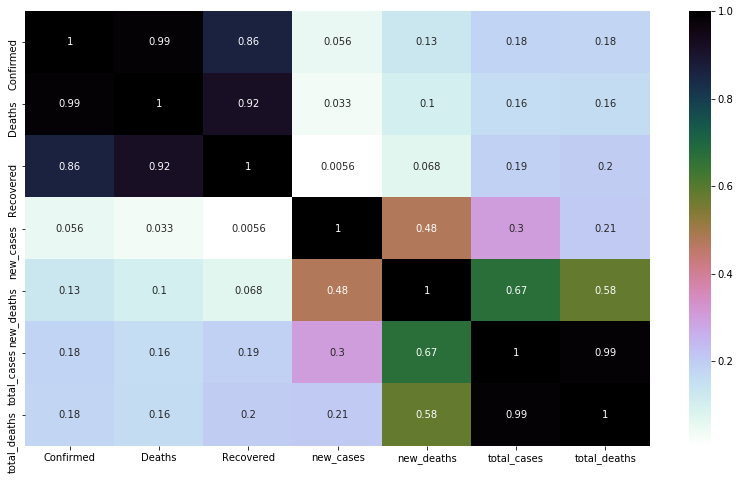

In [280]:
plt.figure(figsize=(14,8))
sns.heatmap(new_data_combined.corr(),annot=True,cmap='cubehelix_r')
plt.show()

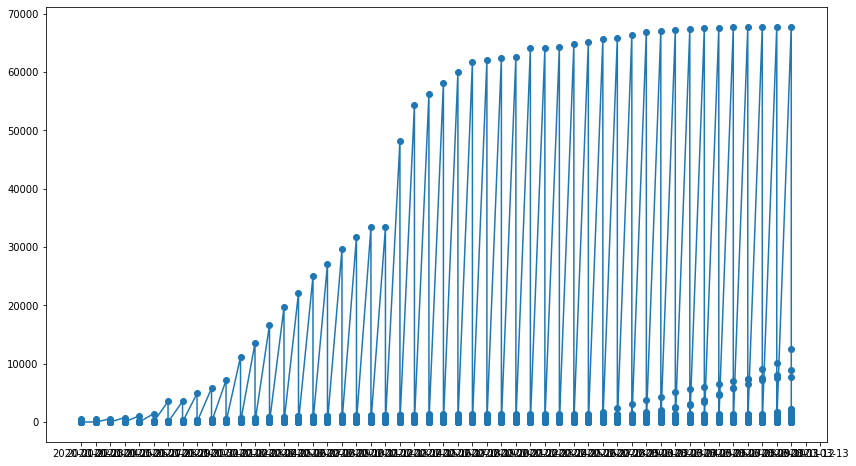

In [281]:
plt.figure(figsize=(14,8))
plt.plot(new_data_combined['date'], new_data_combined['Confirmed'], marker='o')
plt.show()

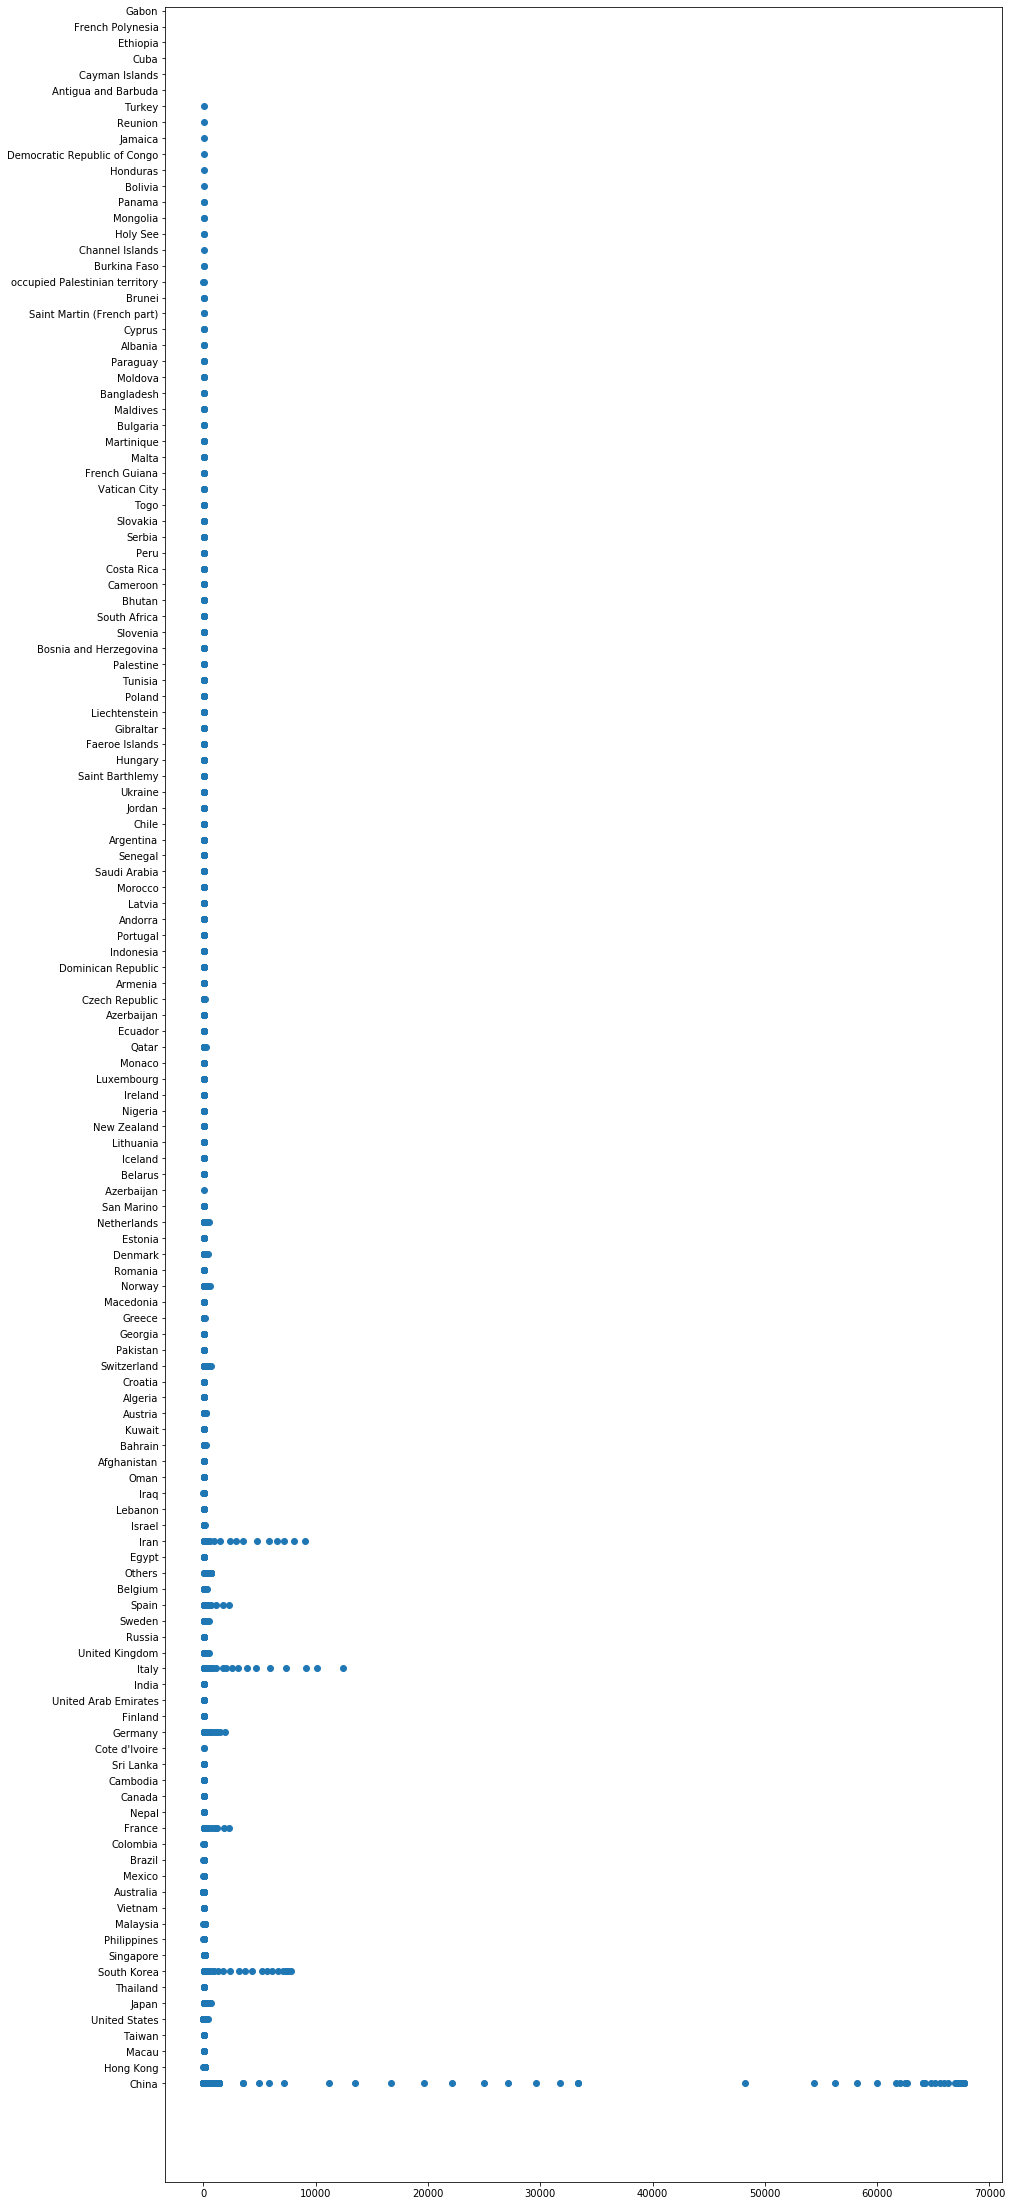

In [282]:
plt.figure(figsize=(15,40))
plt.scatter(new_data_combined['Confirmed'], new_data_combined['Country_Region'])
plt.show()

In [0]:
new_data_combined_usa = new_data_combined[new_data_combined['Country_Region'] == 'United States']

In [284]:
new_data_combined_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006 entries, 34 to 5366
Data columns (total 11 columns):
date              1006 non-null object
Province_State    1003 non-null object
Country_Region    1006 non-null object
Last_Update       1003 non-null object
Confirmed         1003 non-null float64
Deaths            1003 non-null float64
Recovered         1003 non-null float64
new_cases         1005 non-null float64
new_deaths        1005 non-null float64
total_cases       1005 non-null float64
total_deaths      1005 non-null float64
dtypes: float64(7), object(4)
memory usage: 94.3+ KB


In [285]:
new_data_combined_usa["Confirmed"].fillna(0.0, inplace=True)
new_data_combined_usa["Deaths"].fillna(0.0, inplace=True)
new_data_combined_usa["Recovered"].fillna(0.0, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [286]:
new_data_combined_usa["Province_State"].fillna("Unknown", inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



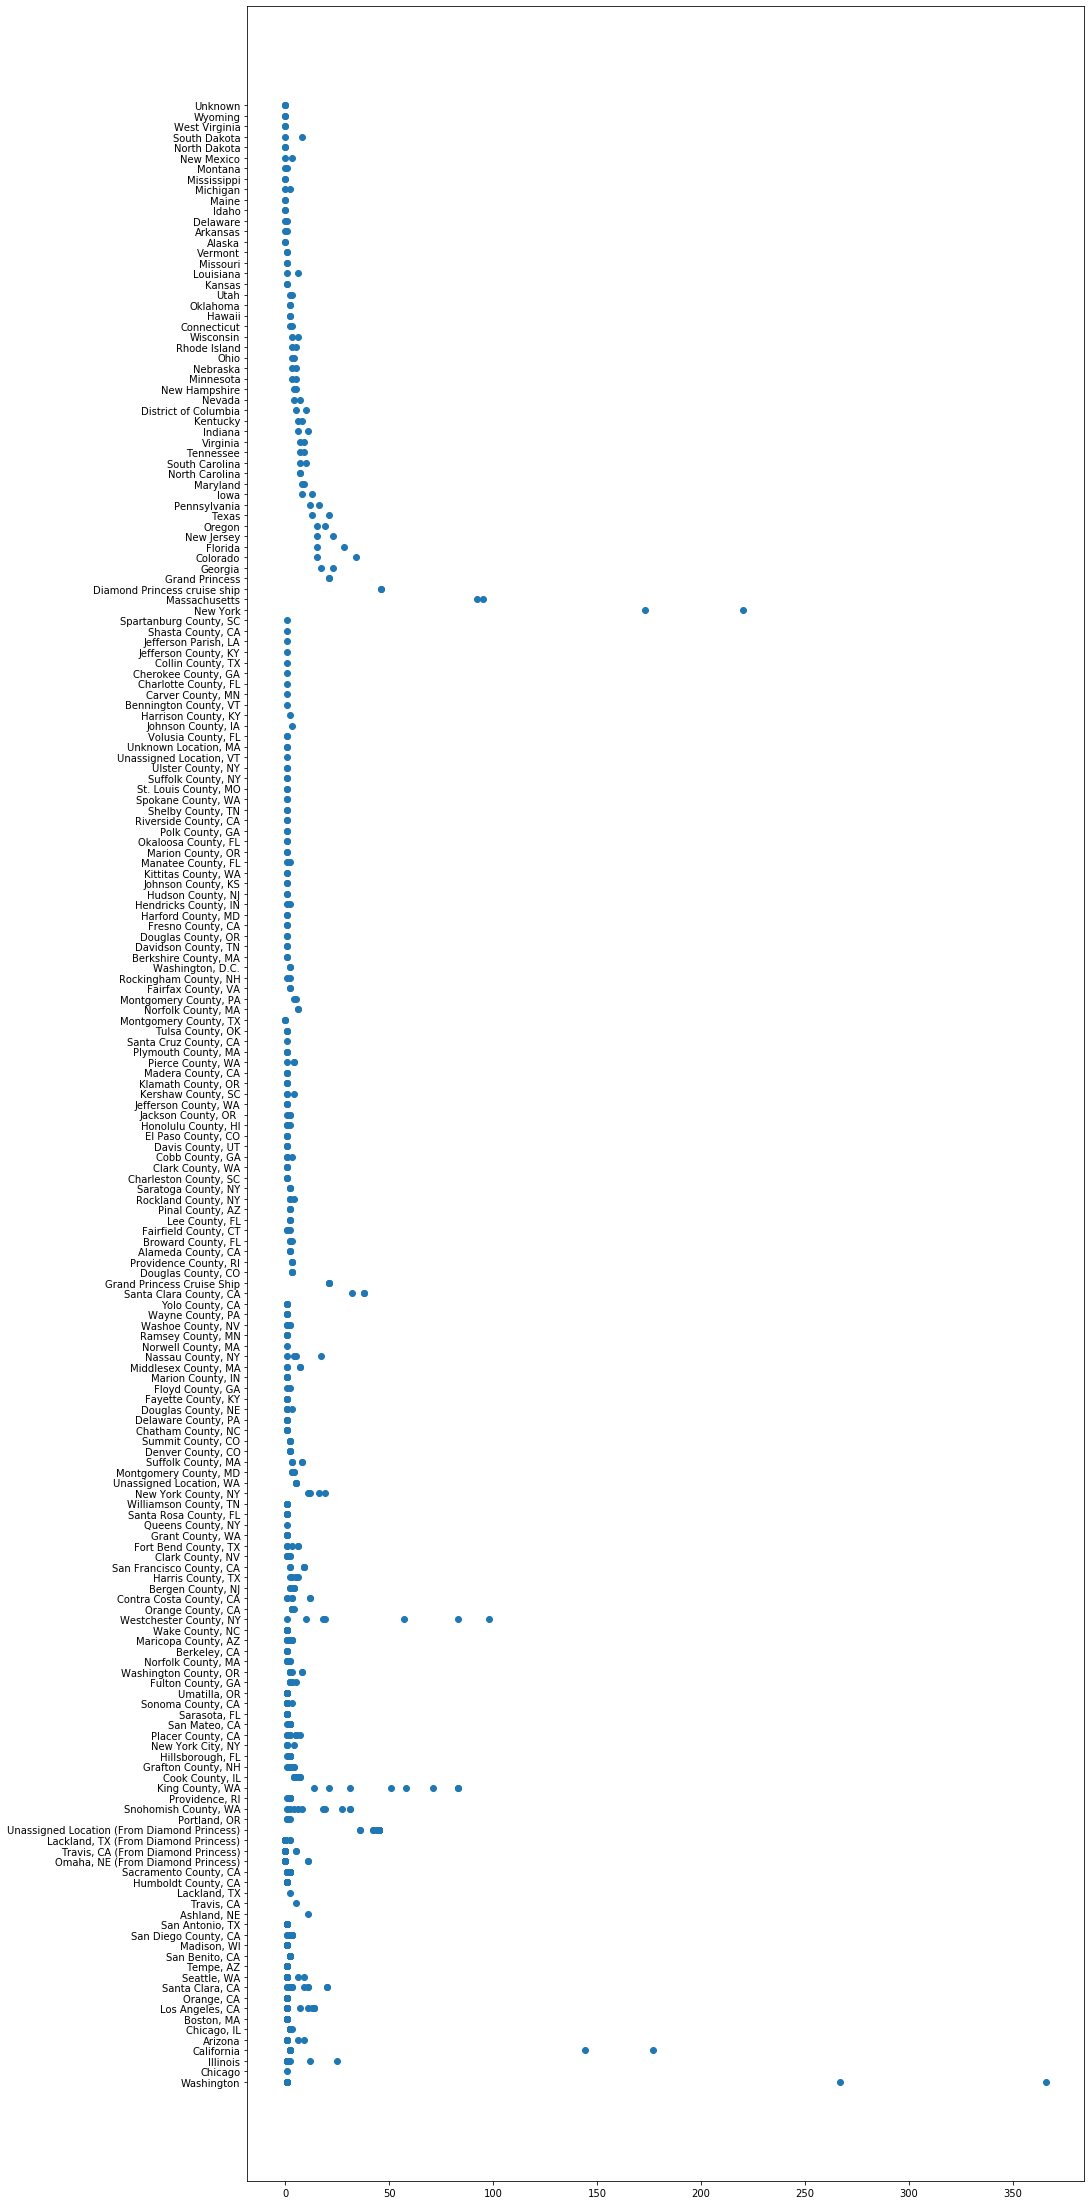

In [287]:
plt.figure(figsize=(15,40))
plt.scatter(new_data_combined_usa['Confirmed'], new_data_combined_usa['Province_State'])
plt.show()

In [288]:
cols = ['Confirmed', 'Deaths', 'Recovered']
new_data_combined_usa[cols] = new_data_combined_usa[cols].applymap(np.int64)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3509: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [0]:
new_us_data_gzc = new_data_combined_usa[new_data_combined_usa['Confirmed'] > 0]

In [0]:
new_us_data_gzd = new_data_combined_usa[new_data_combined_usa['Deaths'] > 0]

In [0]:
new_us_data_gzr = new_data_combined_usa[new_data_combined_usa['Recovered'] > 0]

In [292]:
fig = go.Figure([go.Scatter(x=new_us_data_gzc['date'], y=new_us_data_gzc['Confirmed'])])
fig.show()

In [293]:
fig = go.Figure()
fig.add_trace(go.Scatter(
                x=new_us_data_gzr['date'],
                y=new_us_data_gzr['Recovered'],
                name="Recovered",
                line_color='deepskyblue',
                opacity=0.8))

fig.add_trace(go.Scatter(
                x=new_us_data_gzd['date'],
                y=new_us_data_gzd['Deaths'],
                name="Deaths",
                line_color='red',
                opacity=0.8))

fig.update_layout(title_text="Recovery and Deaths with Rangeslider", xaxis_rangeslider_visible=True)
fig.show()

**Modeling**

**Conclusion:**